Loading and Preprocessing Data...
Data shape after scaling: (150, 4)

Finding Optimal k using Elbow Method...


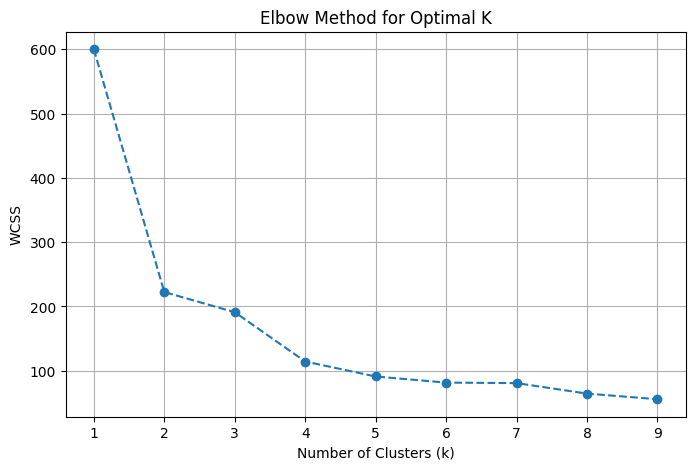

Visual inspection of the plot will determine optimal k. For Iris, k=3 is typical.

Running K-Means Clustering with k=3...
Clustering Complete.

First 5 rows with cluster labels:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster  
0        1  
1        2  
2        2  
3        2  
4        1  

Cluster Center Coordinates (Scaled Features):
[[ 0.57100359 -0.37176778  0.69111943  0.66315198]
 [-0.81623084  1.31895771 -1.28683379 -1.2197118 ]
 [-1.32765367 -0.373138   -1.13723572 -1.11486192]]

Visualizing Results...


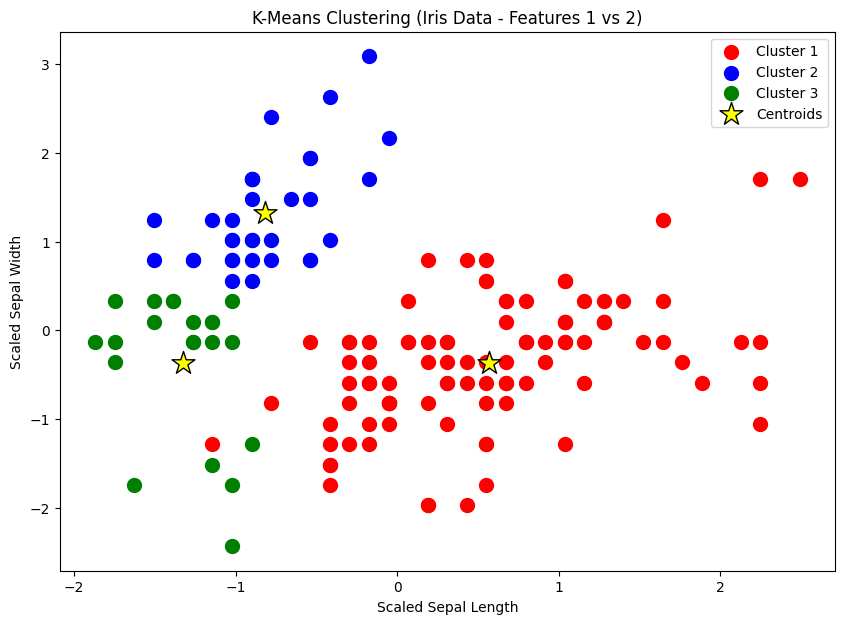

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# --- 1. Data Loading and Preprocessing ---
def load_and_preprocess_data():
    """Loads the Iris dataset, converts it to a DataFrame, and scales the features."""
    print("Loading and Preprocessing Data...")

    # In a real AWS scenario, you would use a function like pd.read_csv('s3://your-bucket/data.csv')
    iris = load_iris()
    X = iris.data # Features
    feature_names = iris.feature_names

    df = pd.DataFrame(X, columns=feature_names)

    # Data Scaling: K-Means is sensitive to the scale of features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    print(f"Data shape after scaling: {X_scaled.shape}")
    return X_scaled, df

# --- 2. Determining Optimal K using the Elbow Method ---
def find_optimal_k(X_scaled, max_k=10):
    """Calculates WCSS for a range of k values to find the optimal k (Elbow Method)."""
    print("\nFinding Optimal k using Elbow Method...")
    wcss = [] # Within-Cluster Sum of Squares
    k_range = range(1, max_k)

    for i in k_range:
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init='auto')
        kmeans.fit(X_scaled)
        wcss.append(kmeans.inertia_) # 'inertia_' is the WCSS

    # Plotting the Elbow Method result
    plt.figure(figsize=(8, 5))
    plt.plot(k_range, wcss, marker='o', linestyle='--')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS')
    plt.grid(True)
    plt.show()

    # Based on the visual analysis of Iris data, k=3 is usually the optimal value.
    # You would visually inspect the graph to select the 'elbow' point.
    print("Visual inspection of the plot will determine optimal k. For Iris, k=3 is typical.")
    return 3 # Hardcoding k=3 based on known dataset structure for clean execution.

# --- 3. K-Means Clustering Implementation ---
def run_kmeans(X_scaled, k):
    """Applies K-Means clustering with the determined k value."""
    print(f"\nRunning K-Means Clustering with k={k}...")
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init='auto')
    y_kmeans = kmeans.fit_predict(X_scaled)

    # Get the final cluster centers
    centers = kmeans.cluster_centers_

    print("Clustering Complete.")
    return y_kmeans, centers

# --- 4. Visualization of Results ---
def visualize_results(X_scaled, y_kmeans, centers):
    """Visualizes the clustered data."""
    print("\nVisualizing Results...")

    # We'll visualize using the first two principal components for 2D plot simplicity,
    # or just the first two features if using a simple dataset like Iris.
    # Here, we use the first two scaled features (Sepal Length and Sepal Width).

    plt.figure(figsize=(10, 7))

    # Scatter plot for each cluster
    plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1],
                s = 100, c = 'red', label = 'Cluster 1')
    plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1],
                s = 100, c = 'blue', label = 'Cluster 2')
    plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1],
                s = 100, c = 'green', label = 'Cluster 3')

    # Plotting the centroids of the clusters
    plt.scatter(centers[:, 0], centers[:, 1], s = 300, c = 'yellow',
                marker='*', label = 'Centroids', edgecolors='black')

    plt.title('K-Means Clustering (Iris Data - Features 1 vs 2)')
    plt.xlabel('Scaled Sepal Length')
    plt.ylabel('Scaled Sepal Width')
    plt.legend()
    plt.show()

# --- Main Execution Block ---
if __name__ == "__main__":
    X_scaled, df = load_and_preprocess_data()

    # Find optimal k (will display the Elbow Plot)
    optimal_k = find_optimal_k(X_scaled)

    # Run the K-Means algorithm
    cluster_labels, cluster_centers = run_kmeans(X_scaled, optimal_k)

    # Add cluster labels back to the original DataFrame for analysis
    df['Cluster'] = cluster_labels
    print("\nFirst 5 rows with cluster labels:")
    print(df.head())

    print("\nCluster Center Coordinates (Scaled Features):")
    print(cluster_centers)

    # Visualize the final results (will display the scatter plot)
    visualize_results(X_scaled, cluster_labels, cluster_centers)

In [3]:
import unittest
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assume this function exists in 'kmeans_clustering.py'
# In a real setup, you would use: from kmeans_clustering import load_and_preprocess_data, run_kmeans

class TestKMeansComponents(unittest.TestCase):
    """Unit tests for the K-Means application components."""

    @classmethod
    def setUpClass(cls):
        """Setup a dummy dataset for all tests."""
        # Simple dummy data for testing: two clusters visible
        cls.dummy_data = np.array([
            [1, 1], [1.5, 2], [3, 4], [5, 7], [3.5, 5], [4.5, 5]
        ])

    def test_data_scaling(self):
        """Test that data is correctly scaled (mean=0, std=1)."""
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(self.dummy_data)

        # Check if the mean of the first feature is close to 0
        self.assertAlmostEqual(scaled_data[:, 0].mean(), 0.0, places=5,
                                msg="Scaled data mean is not close to 0.")

        # Check if the standard deviation of the second feature is close to 1
        self.assertAlmostEqual(scaled_data[:, 1].std(), 1.0, places=5,
                                msg="Scaled data standard deviation is not close to 1.")

        # Check that the scaled array has the same shape
        self.assertEqual(scaled_data.shape, self.dummy_data.shape,
                         msg="Scaled data shape mismatch.")
        print("\nTest data_scaling passed.")


    def test_kmeans_run_and_clustering(self):
        """Test K-Means fitting and the resulting cluster centers."""
        k = 2 # We know there are two clusters in the dummy data
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        cluster_labels = kmeans.fit_predict(self.dummy_data)

        # Test that the number of clusters created matches k
        self.assertEqual(len(np.unique(cluster_labels)), k,
                         msg="Number of unique clusters does not match k.")

        # Test that the output array (labels) has the correct length
        self.assertEqual(len(cluster_labels), len(self.dummy_data),
                         msg="Cluster labels array length mismatch.")

        # Optional: Check if a known point is assigned to an expected cluster
        # Point [1, 1] should be in one cluster, and [5, 7] in the other.
        # This is a soft check, as cluster indexing can vary (0 or 1).
        self.assertNotEqual(cluster_labels[0], cluster_labels[3],
                            msg="Points from distinct groups were clustered together.")
        print("Test kmeans_run_and_clustering passed.")

# Main execution block for unit tests
if __name__ == '__main__':
    # Running the tests
    print("--- Running Unit Tests ---")
    unittest.main(argv=['first-arg-is-ignored'], exit=False)
    print("--------------------------")

..
----------------------------------------------------------------------
Ran 2 tests in 0.010s

OK


--- Running Unit Tests ---

Test data_scaling passed.
Test kmeans_run_and_clustering passed.
--------------------------
